In [9]:
from neuralprophet import NeuralProphet
import pandas as pd

def make_df(filename, ID, slicing = 0):
    df = pd.read_csv(filename)
    
    if slicing:
        l = len(df)
        df = df.head(slicing)
        print(f'sliced into {len(df)} out of {l} data.')
        
    df.rename(columns={'Date' : 'ds' , 'S' : 'y'}, inplace = True)
    
    df['ds'] = pd.to_datetime(df['ds'])
    df.set_index('ds', inplace = True)
    df_daily = df.resample('D').mean()
    
    df_daily['H'].fillna(method='ffill', inplace = True)
    df = df_daily.reset_index()
    df['ID'] = ID
    
    df = df[['ds','y','H','ID']]
    
    return df

# 298 기간

df1 = make_df('H-S_seq_1.csv',ID = 'data1')
df2 = make_df('H-S_seq_2.csv',ID = 'data2')
df3 = make_df('H-S_seq_3.csv',ID = 'data3')
df4 = make_df('H-S_seq_4.csv',ID = 'data4')
df5 = make_df('H-S_seq_5.csv',ID = 'data5')
df6 = make_df('H-S_seq_6.csv',ID = 'data6')
df7 = make_df('H-S_seq_7.csv',ID = 'data7')
df8 = make_df('H-S_seq_8.csv',ID = 'data8')


In [10]:
dfset1 = pd.concat((df3, df4, df5)) # 1
dfset2 = pd.concat((df6, df7, df8)) # 2

m1 = NeuralProphet(learning_rate=0.1, 
                  yearly_seasonality=False, 
                  weekly_seasonality=False, 
                  unknown_data_normalization=True, 
                  newer_samples_weight = 4,
                #   drop_missing = True,
                  optimizer = 'AdamW'
                  )
m1 = m1.add_future_regressor(name='H', normalize=True)
metrics = m1.fit(dfset1)

m2 = NeuralProphet(learning_rate=0.1, 
                  yearly_seasonality=False, 
                  weekly_seasonality=False, 
                  unknown_data_normalization=True, 
                  newer_samples_weight = 4,
                #   drop_missing = True,
                  optimizer = 'AdamW'
                  )
m2 = m2.add_future_regressor(name='H', normalize=True)
metrics = m2.fit(dfset2)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.forecaster.__handle_missing_data) - dropped 236 NAN row in 'y'
INFO - (NP.forecaster.__handle_missing_data) - dropped 236 NAN row in 'y'
INFO - (NP.forecaster.__handle_missing_data) - dropped 234 NAN row in 'y'
ERROR - (NP.df_utils.get_normalization_params) - Normalization True not defined.
ERROR - (NP.df_utils.get_normalization_params) - Normalization True not defined.
ERROR - (NP.df_utils.get_normalization_params) - Normalization True not defined.
ERROR -

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


,ds,y,ID,residual1,yhat1,trend,future_regressors_additive,future_regressor_H
0,2021-08-06,0.000,data1,3.499719,3.499719,3.499719,0.000000,0.000000
1,2021-08-07,NaN,data1,NaN,3.652303,3.652303,0.000000,0.000000
2,2021-08-08,NaN,data1,NaN,3.804888,3.804888,0.000000,0.000000
3,2021-08-09,NaN,data1,NaN,3.957473,3.957473,0.000000,0.000000
4,2021-08-10,NaN,data1,NaN,4.110058,4.110058,0.000000,0.000000
...,...,...,...,...,...,...,...,...
293,2022-05-26,NaN,data1,NaN,57.613461,55.461891,2.151568,2.151568
294,2022-05-27,54.932,data1,2.691150,57.623150,55.471581,2.151568,2.151568
295,2022-05-28,NaN,data1,NaN,57.632843,55.481274,2.151568,2.151568
296,2022-05-29,NaN,data1,NaN,57.642532,55.490967,2.151568,2.151568


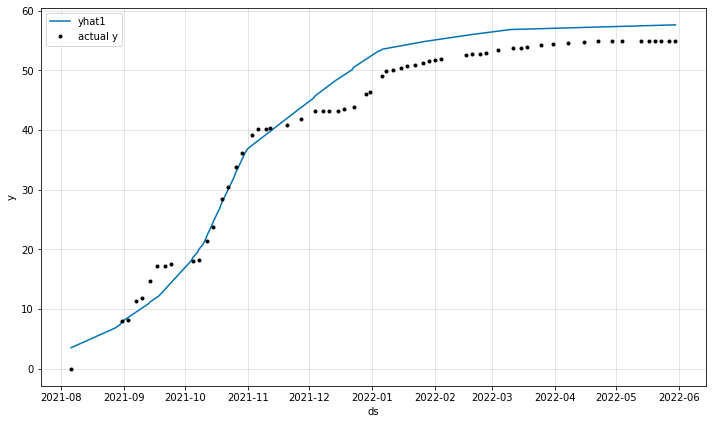

In [11]:
forecast1 = m1.predict(df1)
m1.plot(forecast1)
forecast1

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


,ds,y,ID,residual1,yhat1,trend,future_regressors_additive,future_regressor_H
0,2021-08-06,0.000,data2,2.265446,2.265446,2.265446,0.000000,0.000000
1,2021-08-07,NaN,data2,NaN,2.500685,2.500685,0.000000,0.000000
2,2021-08-08,NaN,data2,NaN,2.735924,2.735924,0.000000,0.000000
3,2021-08-09,NaN,data2,NaN,2.971163,2.971163,0.000000,0.000000
4,2021-08-10,NaN,data2,NaN,3.206402,3.206402,0.000000,0.000000
...,...,...,...,...,...,...,...,...
293,2022-05-26,NaN,data2,NaN,52.820885,38.356838,14.464046,14.464046
294,2022-05-27,52.948,data2,-0.108366,52.839634,38.375587,14.464046,14.464046
295,2022-05-28,NaN,data2,NaN,52.858383,38.394337,14.464046,14.464046
296,2022-05-29,NaN,data2,NaN,52.877132,38.413086,14.464046,14.464046


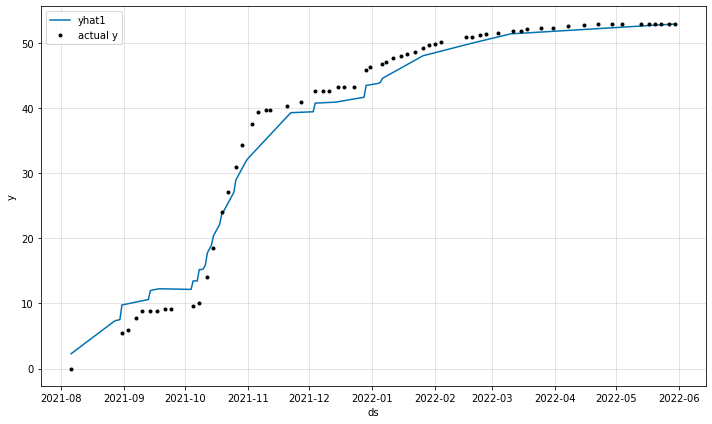

In [12]:
forecast2 = m2.predict(df2)
m2.plot(forecast2)
forecast2